In [1]:
import os, sys
sys.path.append('/Users/tom/dev/imperial/FYP/MAax/')

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read JSON files
with open('batch_times_avg_100.json', 'r') as f1, open('mujoco_times_100.json', 'r') as f2, open('batch_times_no_walls_1000.json', 'r') as f3:
    wall_data = json.load(f1)
    mujoco_data = json.load(f2)
    no_wall_data = json.load(f3)

In [4]:
# Process data
x_values = list(wall_data.keys())
mujoco_mean_values = []
mujoco_std_values = []
wall_mean_values = []
wall_std_values = []
no_mean_values = []
no_std_values = []

x_values = x_values[:-1]

for x in x_values:
    mujoco_times = mujoco_data[x][1:]  # Discard the first entry
    wall_times = wall_data[x][1:]  # Discard the first entry
    no_times = no_wall_data[x][1:]  # Discard the first entry
    wall_times = 10 * np.asarray(wall_times)
    mujoco_times = 10 * np.asarray(mujoco_times)
    
    mujoco_mean = np.mean(mujoco_times)
    mujoco_std = np.std(mujoco_times)
    wall_mean = np.mean(wall_times)
    wall_std = np.std(wall_times)
    no_mean = np.mean(no_times)
    no_std = np.std(no_times)
    
    mujoco_mean_values.append(mujoco_mean)
    mujoco_std_values.append(mujoco_std)
    wall_mean_values.append(wall_mean)
    wall_std_values.append(wall_std)
    no_mean_values.append(no_mean)
    no_std_values.append(no_std)
    

In [5]:
# Process evals per sec
mujoco_eval_mean_values = []
mujoco_eval_std_values = []
wall_eval_mean_values = []
wall_eval_std_values = []
no_eval_mean_values = []
no_eval_std_values = []

eval_batch_sizes = x_values

for x in eval_batch_sizes:
    mujoco_times = np.asarray(mujoco_data[str(x)][1:])  # Discard the first entry
    wall_times = np.asarray(wall_data[str(x)][1:])  # Discard the first entry
    wall_times = 10 * np.asarray(wall_times)
    mujoco_times = 10 * np.asarray(mujoco_times)
    no_times = np.asarray(no_wall_data[str(x)][1:])  # Discard the first entry
    
    mujoco_evals_per_sec = (1000 * int(x)) / mujoco_times
    wall_evals_per_sec = (1000 * int(x)) / wall_times
    no_evals_per_sec = (1000 * int(x)) / no_times
    
    mujoco_mean = np.mean(mujoco_evals_per_sec)
    mujoco_std = np.std(mujoco_evals_per_sec)
    wall_mean = np.mean(wall_evals_per_sec)
    wall_std = np.std(wall_evals_per_sec)
    no_mean = np.mean(no_evals_per_sec)
    no_std = np.std(no_evals_per_sec)
    
    mujoco_eval_mean_values.append(mujoco_mean)
    mujoco_eval_std_values.append(mujoco_std)
    wall_eval_mean_values.append(wall_mean)
    wall_eval_std_values.append(wall_std)
    no_eval_mean_values.append(no_mean)
    no_eval_std_values.append(no_std)

print("Eval mean: ", mujoco_eval_mean_values)

Eval mean:  [411.3363618720926, 705.0617006692717, 874.3370871727417, 869.2146867311355, 883.6075932860865, 879.6546595807117, 878.4326950339173, 882.1134043190904]


In [6]:
print(len(x_values))
print(len(mujoco_mean_values))
print(len(mujoco_eval_mean_values))

8
8
8


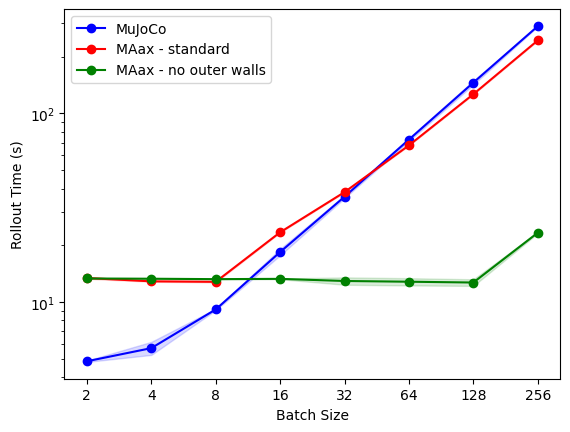

In [9]:
# Plotting
plt.plot(x_values, mujoco_mean_values, label="MuJoCo", marker='o', color='blue')
plt.plot(x_values, wall_mean_values, label="MAax - standard", marker='o', color='red')
plt.plot(x_values, no_mean_values, label="MAax - no outer walls", marker='o', color='green')
plt.fill_between(x_values, np.array(mujoco_mean_values) - np.array(mujoco_std_values),
                 np.array(mujoco_mean_values) + np.array(mujoco_std_values),
                 alpha=0.15, color='blue')
plt.fill_between(x_values, np.array(wall_mean_values) - np.array(wall_std_values),
                 np.array(wall_mean_values) + np.array(wall_std_values),
                 alpha=0.15, color='red')
plt.fill_between(x_values, np.array(no_mean_values) - np.array(no_std_values),
                 np.array(no_mean_values) + np.array(no_std_values),
                 alpha=0.15, color='green')
plt.xlabel('Batch Size')
plt.ylabel('Rollout Time (s)')
plt.yscale("log")
plt.legend()
plt.savefig('maax_mj_rollout.png')
plt.show()

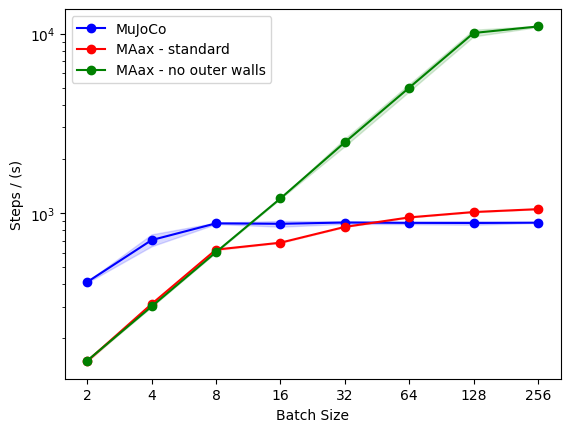

In [10]:
# Plotting
plt.plot(eval_batch_sizes, mujoco_eval_mean_values, label="MuJoCo", marker='o', color='blue')
plt.plot(eval_batch_sizes, wall_eval_mean_values, label="MAax - standard", marker='o', color='red')
plt.plot(eval_batch_sizes, no_eval_mean_values, label="MAax - no outer walls", marker='o', color='green')
plt.fill_between(eval_batch_sizes, np.array(mujoco_eval_mean_values) - np.array(mujoco_eval_std_values),
                 np.array(mujoco_eval_mean_values) + np.array(mujoco_eval_std_values),
                 alpha=0.15, color='blue')
plt.fill_between(eval_batch_sizes, np.array(wall_eval_mean_values) - np.array(wall_eval_std_values),
                 np.array(wall_eval_mean_values) + np.array(wall_eval_std_values),
                 alpha=0.15, color='red')
plt.fill_between(eval_batch_sizes, np.array(no_eval_mean_values) - np.array(no_eval_std_values),
                 np.array(no_eval_mean_values) + np.array(no_eval_std_values),
                 alpha=0.15, color='green')
plt.xlabel('Batch Size')
plt.ylabel('Steps / (s)')
plt.yscale("log")
plt.legend()
plt.savefig('maax_mj_steps.png')
plt.show()

In [11]:
print(mujoco_eval_mean_values)
print(np.max(mujoco_eval_mean_values))

[411.3363618720926, 705.0617006692717, 874.3370871727417, 869.2146867311355, 883.6075932860865, 879.6546595807117, 878.4326950339173, 882.1134043190904]
883.6075932860865
